No handles with labels found to put in legend.


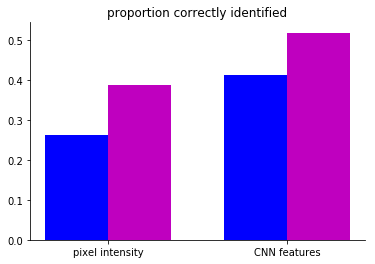

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# load up the data
pred_nn_filt = np.load('../images-etc/pred_nn_filt.npy')
pred_nn_raw = np.load('../images-etc/pred_nn_raw.npy')
pred_intens_filt = np.load('../images-etc/pred_intens_filt.npy')
pred_intens_raw = np.load('../images-etc/pred_intens_raw.npy')

act_nn_filt = np.load('../images-etc/act_nn_filt.npy')
act_nn_raw = np.load('../images-etc/act_nn_raw.npy')
act_intens_filt = np.load('../images-etc/act_intens_filt.npy')
act_intens_raw = np.load('../images-etc/act_intens_raw.npy')

# compute accuracy

acc_nn_filt = np.mean(pred_nn_filt==act_nn_filt)
acc_nn_raw = np.mean(pred_nn_raw==act_nn_raw)
acc_intens_filt = np.mean(pred_intens_filt==act_intens_filt)
acc_intens_raw = np.mean(pred_intens_raw==act_intens_raw)


n = 2
raw_means = (acc_intens_raw,acc_nn_raw)
filt_means = (acc_intens_filt,acc_nn_filt)

fig, ax = plt.subplots()
ind = np.arange(n)    # the x locations for the groups
width = 0.35         # the width of the bars
p1 = ax.bar(ind, raw_means, width, color='b')


p2 = ax.bar(ind + width, filt_means, width,
            color='m')

ax.set_title('proportion correctly identified')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('pixel intensity', 'CNN features'))

ax.autoscale_view()

# remove the frame of the chart
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend((p1, p2), ('unfiltered', 'median filtered'))
ax.legend(frameon=False)

#plt.show()
plt.savefig('accuracy_across_schemes.png')




In [16]:
np.sum(np.array([pred==1 for pred in pred_nn_filt]) & np.array([act==1 for act in act_nn_filt]))/np.sum(np.array([act==1 for act in act_nn_filt]))
np.sum(np.array([pred==4 for pred in pred_nn_filt]))

33

In [2]:
# confusion matrices

from sklearn.metrics import confusion_matrix

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(act_nn_filt, pred_nn_filt)
np.set_printoptions(precision=2)

class_names = ['bear','canine','feline','hooved','other']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('confusion_matrix_nn_filt.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('confusion_matrix_nn_filt_norm.png')

plt.show()


NameError: name 'act_nn_filt' is not defined

In [ ]:

# precision-recall for each class, not yet tested

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))


#Plot the micro-averaged Precision-Recall curve
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))
../../_images/sphx_glr_plot_precision_recall_002.png
Plot Precision-Recall curve for each class and iso-f1 curves
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()